
 # Linear Regression

## PETE 2061 Lab 9

<a id='top'></a>

In [71]:
import numpy as np
import scipy.stats as ss 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

# Correlation and Linear Regression

## A simple data set

In [73]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [1.1,1.9,3.2,4.2,5.1,6.1,6.8,7.9,9.3,11]

### Calculate Z-scores

In [76]:
z_x = (x-np.mean(x))/np.std(x, ddof=1)  #uses sample std when ddof=1. It means you divide by (n-1) and not n.
z_x

array([-1.48630108, -1.15601195, -0.82572282, -0.49543369, -0.16514456,
        0.16514456,  0.49543369,  0.82572282,  1.15601195,  1.48630108])

**The default degree of freedom (ddof) when ddof is not provided is 0, which means it calculates population standard deviation, and not sample standard deviation**
* For sample variance: $\sigma^2 = \frac{\sum_{i=1}^n (x_i - \mu)^2}{n-1} $
* For population variance: $\sigma^2 = \frac{\sum_{i=1}^n (x_i - \mu)^2}{n} $
* Recall that standard deviation is the square root of variance.
* ddof = 1 implies that the data given is a sample from a population, while ddof = 0 (which is the default) implies that the data given is the population.

In [77]:
z_x = ss.zscore(x,ddof=1) # ddof = 1 (uses sample std)
z_y = ss.zscore(y,ddof=1)

In [78]:
z_x

array([-1.48630108, -1.15601195, -0.82572282, -0.49543369, -0.16514456,
        0.16514456,  0.49543369,  0.82572282,  1.15601195,  1.48630108])

In [79]:
z_y

array([-1.42853853, -1.17791773, -0.77065894, -0.45738295, -0.17543456,
        0.13784144,  0.35713463,  0.70173822,  1.14032461,  1.6728938 ])

In [80]:
z_x = ss.zscore(x)  #this will assume that x is the population and not a sample. ie. ddof=0
z_x

array([-1.5666989 , -1.21854359, -0.87038828, -0.52223297, -0.17407766,
        0.17407766,  0.52223297,  0.87038828,  1.21854359,  1.5666989 ])

### Calculate $r$ value

In [81]:
zx = ss.zscore(x,ddof=len(x)-1) # this trick with ddof takes out the division by n-1 or n in std. 
zy = ss.zscore(y,ddof=len(y)-1)
sum(zx*zy)    # compare this with the formula for r in lecture note.

0.995627257890435

### Calculate $r^2$ (this is what excel gives you)

In [17]:
(sum(zx*zy))**2

0.9912736366544268

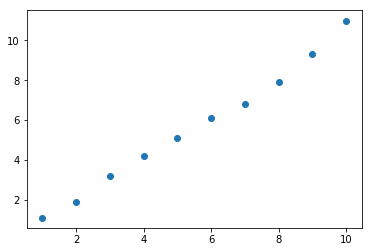

In [18]:
plt.scatter(x,y)
plt.show()

### Perform Linear Regression

In [19]:
[slope, intercept, r_value, p_value, std_err]=ss.linregress(x,y)
print(f" slope = {slope} \n intercept = {intercept} \n r_value = {r_value} \n p_value = {p_value} \n std_err = {std_err} ")

 slope = 1.0496969696969698 
 intercept = -0.11333333333333417 
 r_value = 0.9956272578904354 
 p_value = 1.591156211680006e-09 
 std_err = 0.03482080587205541 


In [20]:
y_model = slope*np.array(x) + intercept

In [21]:
y_model

array([ 0.93636364,  1.98606061,  3.03575758,  4.08545455,  5.13515152,
        6.18484848,  7.23454545,  8.28424242,  9.33393939, 10.38363636])

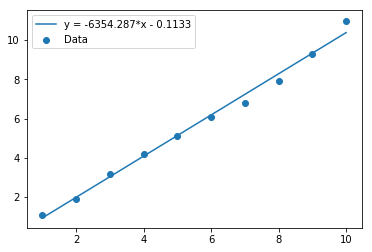

In [83]:
plt.scatter(x,y)
plt.plot(x,y_model)
if intercept > 0:
    sign = '+'
else:
    sign = '-'
txt = 'y = '+str(round(slope,4))+'*x '+sign+' '+str(abs(round(intercept,4)))  
#creates string that describes the equation of the regressed line
plt.legend([txt,'Data'])
plt.show()

### Properties of Correlation Coefficient
It is not changed by:
* Multiplying each value by a positive constant
* Adding a constant to each value
* Interchanging x and y

The two cells below show this:

In [26]:
[slope,inter,r,p,stderr]=ss.linregress(2*np.array(x)+7,y)
r

0.9956272578904354

In [27]:
[slope,inter,r,p,stderr]=ss.linregress(y,x)
r

0.9956272578904354

## Porosity from Seismic Data
Estimating porosity from seismic signal transit time is a great use of Least-Squares Lines and correlations. First let us look at some data.


In [29]:
depth = np.arange(2000,14000,1000)
poro = np.array([.346,.318,.292,.268,.246,.226,.208,.191,.175,.161,.148,.136])
intTrans = np.array([153,140,132,126,118,120,112,106,102,103,93,96])
matTrans = np.array([122,108,100,96,88,94,87,82,79,83,73,78])
df = pd.DataFrame({'AveDepth':depth,'Porosity':poro,'IntervalTransitTime':intTrans,'MatrixTransitTime':matTrans})

In [30]:
df

,AveDepth,Porosity,IntervalTransitTime,MatrixTransitTime
0,2000,0.346,153,122
1,3000,0.318,140,108
2,4000,0.292,132,100
3,5000,0.268,126,96
4,6000,0.246,118,88
5,7000,0.226,120,94
6,8000,0.208,112,87
7,9000,0.191,106,82
8,10000,0.175,102,79
9,11000,0.161,103,83


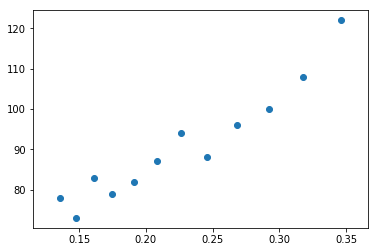

In [32]:
plt.scatter(df.Porosity,df['MatrixTransitTime'])
plt.show()

In [33]:
[slope,inter,r,p,stderr]=ss.linregress(df['Porosity'],df['MatrixTransitTime'])
print(slope,inter,r)

194.86063849756223 46.74611387325988 0.9529890656625238


***The equation for the line of best fit is: $t_{ma}=46.746+194.86\phi$***

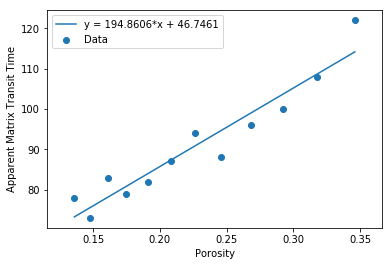

In [36]:
t_ma = np.array(df['Porosity'])*slope+inter
plt.scatter(df['Porosity'],df['MatrixTransitTime'])
plt.plot(df['Porosity'],t_ma)
if inter > 0:
    sign = '+'
else:
    sign = '-'
txt = 'y = '+str(round(slope,4))+'*x '+sign+' '+str(abs(round(inter,4)))
plt.legend([txt,'Data'])
plt.xlabel('Porosity')
plt.ylabel('Apparent Matrix Transit Time')
plt.show()

**Can you fit a straight line model (linear regression) to the data for interval transit time as a function of average depth?**

## Example
An engineer wants to predict the value for y when x=4.5 using the following data set:

In [84]:
x = np.arange(1,11,1)
y = np.array([0.2,0.3,0.5,0.5,1.3,2.3,2.9,4.5,8.7,12.])

In [85]:
df = pd.DataFrame({'x':x,'y':y})
df

,x,y
0,1,0.2
1,2,0.3
2,3,0.5
3,4,0.5
4,5,1.3
5,6,2.3
6,7,2.9
7,8,4.5
8,9,8.7
9,10,12.0


## Construct a scatter plot

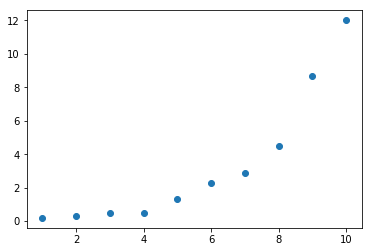

In [86]:
plt.scatter(x,y)
plt.show()

### Should the least-squares line be used to predict the value of y when x=4.5?

In [87]:
[slope,inter,r,p,stderr]=ss.linregress(df['x'],df['y'])
print (slope,inter,r)

1.170909090909091 -3.119999999999999 0.8809813800237662


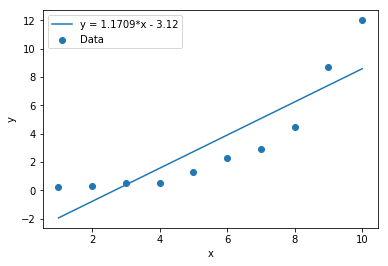

In [88]:
y1 = np.array(df.x)*slope+inter
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],y1)
if inter > 0:
    sign = '+'
else:
    sign = '-'
txt = 'y = '+str(round(slope,4))+'*x '+sign+' '+str(abs(round(inter,4)))
plt.legend([txt,'Data'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [89]:
x = 4.5
y = x*slope+inter
print('y =',y,'for x =',x)

y = 2.1490909090909103 for x = 4.5


### Construct a scatter plot of (x,z) where z = ln(y)

In [90]:
df['z'] = np.log(df['y'])

In [91]:
df

,x,y,z
0,1,0.2,-1.609438
1,2,0.3,-1.203973
2,3,0.5,-0.693147
3,4,0.5,-0.693147
4,5,1.3,0.262364
5,6,2.3,0.832909
6,7,2.9,1.064711
7,8,4.5,1.504077
8,9,8.7,2.163323
9,10,12.0,2.484907


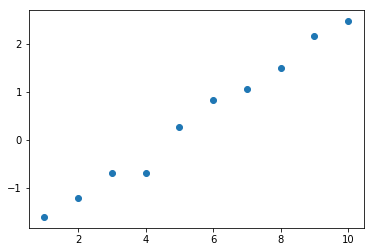

In [95]:
plt.scatter(df.x,df.z)

### Perform a regression and find slope, intercept and r values

In [96]:
[slope,inter,r,p,stderr]=ss.linregress(df['x'],df['z'])
print (slope,inter,r)

0.468184323440667 -2.1637551670496777 0.99346064102356


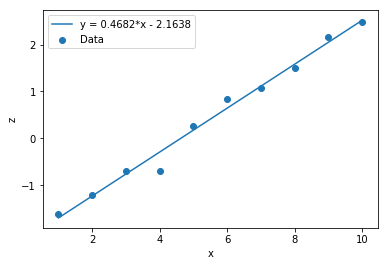

In [97]:
z1 = np.array(df.x)*slope+inter
plt.scatter(df.x,df.z)
plt.plot(df.x,z1)
if inter > 0:
    sign = '+'
else:
    sign = '-'
txt = 'y = '+str(round(slope,4))+'*x '+sign+' '+str(abs(round(inter,4)))
plt.legend([txt,'Data'])
plt.xlabel('x')
plt.ylabel('z')
plt.show()

### How do we now predict y when x = 4.5?

In [98]:
x = 4.5
z = x*slope+inter
y = np.exp(z)
print('y =',y,'for x =',x)

y = 0.9446642443866272 for x = 4.5


## PVT Data
Building a Cox chart for n-hexane to predict the vapor pressure change based on temperature.

In [99]:
df = pd.DataFrame({'Temp_F':[155.7,199.4,269.1,331.9,408.9,454.6],
                  'Vapor_Pressure':[14.7,29.4,73.5,147.0,293.9,435.]})

In [100]:
df

,Temp_F,Vapor_Pressure
0,155.7,14.7
1,199.4,29.4
2,269.1,73.5
3,331.9,147.0
4,408.9,293.9
5,454.6,435.0


$ln(p_v)=-\frac{L_v}{R}\frac{1}{T}+C$

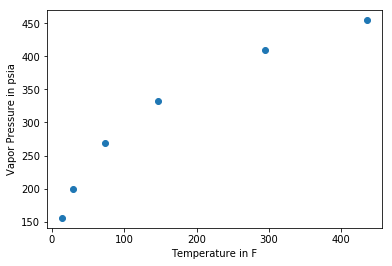

In [101]:
plt.scatter(df['Vapor_Pressure'],df['Temp_F'])
plt.xlabel('Temperature in F')
plt.ylabel('Vapor Pressure in psia')
plt.show()

In [102]:
df['Temp_R'] = df.Temp_F+460

In [103]:
df['inv_Temp_R'] = 1/df.Temp_R

In [104]:
df

,Temp_F,Vapor_Pressure,Temp_R,inv_Temp_R
0,155.7,14.7,615.7,0.001624
1,199.4,29.4,659.4,0.001517
2,269.1,73.5,729.1,0.001372
3,331.9,147.0,791.9,0.001263
4,408.9,293.9,868.9,0.001151
5,454.6,435.0,914.6,0.001093


In [105]:
df['log_Pv'] = np.log(df.Vapor_Pressure)

In [106]:
df

,Temp_F,Vapor_Pressure,Temp_R,inv_Temp_R,log_Pv
0,155.7,14.7,615.7,0.001624,2.687847
1,199.4,29.4,659.4,0.001517,3.380995
2,269.1,73.5,729.1,0.001372,4.297285
3,331.9,147.0,791.9,0.001263,4.990433
4,408.9,293.9,868.9,0.001151,5.683240
5,454.6,435.0,914.6,0.001093,6.075346


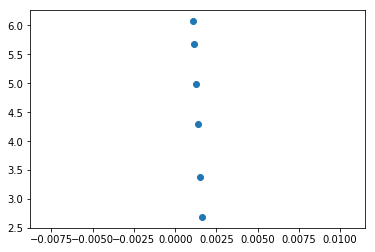

In [107]:
plt.scatter(df.inv_Temp_R,df.log_Pv)
plt.show()

**Code below shows how to generate and save high-quality plots**

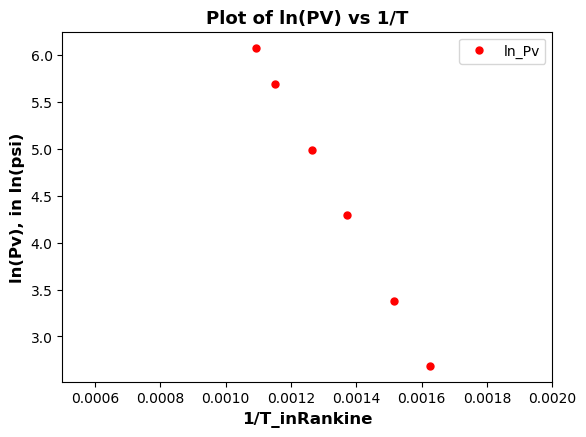

In [110]:
Fig1 = plt.figure(figsize=(7,5), dpi=100)
# Add set of axes to figure
axes = Fig1.add_axes([0.15, 0.15, 0.7, 0.7])# left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(df['inv_Temp_R'], df['log_Pv'], color="red", ls='none', marker='o', markersize=5,label = 'ln_Pv')
axes.legend()
axes.set_title('Plot of ln(PV) vs 1/T', fontsize=13, fontweight='bold')
axes.set_xlabel('1/T_inRankine', fontsize=12, fontweight='bold') # Notice the use of set_ to begin methods
axes.set_ylabel('ln(Pv), in ln(psi)', fontsize=12, fontweight='bold')
axes.set_xlim([0.0005, 0.002])

#Code below shows how to save plot. Note that dpi=600 gives high resolution, which is good for publications...
Fig1.savefig("CoxChart.png", dpi=600)

In [111]:
[slope,inter,r,p,stderr]=ss.linregress(df.inv_Temp_R,df.log_Pv)
print (slope,inter,r)

-6354.286993042116 13.012004816894127 -0.9999759602665691


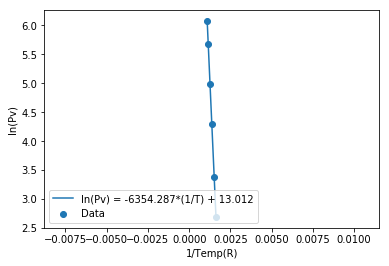

In [112]:
Pv1 = np.array(df.inv_Temp_R)*slope+inter
plt.scatter(df.inv_Temp_R,df.log_Pv)
plt.plot(df.inv_Temp_R,Pv1)
if inter > 0:
    sign = '+'
else:
    sign = '-'
txt = 'ln(Pv) = '+str(round(slope,4))+'*(1/T) '+sign+' '+str(abs(round(inter,4)))
plt.legend([txt,'Data'])
plt.xlabel('1/Temp(R)')
plt.ylabel('ln(Pv)')
plt.show()

### Calculate Vapor Pressure at 300F

In [69]:
T = 300 + 460
ln_Pv = slope*(1/T)+inter
Pv = np.exp(ln_Pv)
print(Pv)

104.70018435637517
